# signal processing
<br>

- The signal submodule contains many functions for filtering and analysing signals of any kind some examples in the signal module are concolution , bandpass filter, effient wavelet, peak finding or spectral analysis

- Additionally ndimage sub-module offer functions for multi-dimensional images(also include uni-dimensional data processing). on the top of multidimensional generalizaions from singal the ndimage module also implements morphplogical operations on images such as dilation, erosion, opening, closing

signal submodule for  uni dimentional signal 
ndimage submodule for` uni and mulit-dimensional signal

- gaussian filter :- local averaging positive and negative freaquncy according to certain sigma
    
- butterworth filter :- removing highly oscilating signals
signal.butter(order of supressing, frequncy threshold, sample rate (for each n seconds m values are reconded for the singal)
the format at which the signal will be returned)

- prewit filer :- approximation of the first derivative of the image function

In [2]:
from scipy import signal, ndimage
import numpy as np
import matplotlib.pyplot as plt

example of noisy data and try to reconstruct original data by filtering

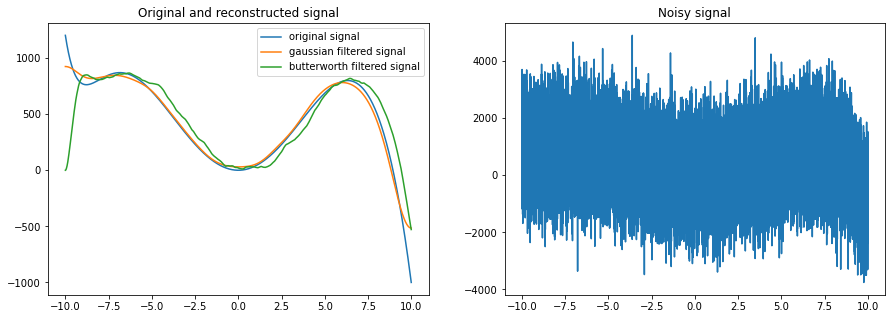

In [5]:
duration=30
srate=1024

def noise(size, strength=1):
    return np.random.normal(scale=strength, size=size)

x=np.linspace(-10,10, srate*duration)
y=-0.5 * x ** 4 + 40 * x ** 2 + 0.1 / np.exp(x)
n=y+noise(y.size, strength=1000)

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
axes[0].plot(x,y, label="original signal")
axes[1].plot(x,n)

#applying gassian filter
p1=ndimage.gaussian_filter1d(n, sigma=1000)
p2=signal.sosfilt(signal.butter(2,0.3,fs=srate, output='sos'), n)

axes[0].plot(x,p1, label="gaussian filtered signal")
axes[0].plot(x,p2, label="butterworth filtered signal")
axes[0].legend()

axes[0].set_title("Original and reconstructed signal")
axes[1].set_title("Noisy signal")
plt.show()

# Audio signal

scipy is capable of some basic audio processing therefore scipy.io.wavfile submodule has functions for reading and writing audio files
and scipy.signal offers tools for spectral analysis

In [6]:
from scipy.io import wavfile as wf

<ipython-input-25-fb7c6f5c51dd>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wf.read('C:/Users/SourcesNet/Downloads/test.wav')
<ipython-input-25-fb7c6f5c51dd>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  audio = (audio.astype(np.float) - audio.min()) / (audio.max().astype(np.float) - audio.min())


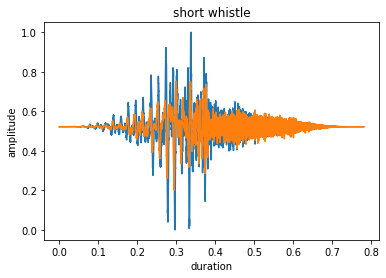

In [25]:
rate, audio = wf.read('C:/Users/SourcesNet/Downloads/test.wav')
audio = (audio.astype(np.float) - audio.min()) / (audio.max().astype(np.float) - audio.min())

plt.title("short whistle")
plt.plot(np.arange(len(audio)) / rate, audio)
plt.xlabel("duration")
plt.ylabel("amplitude")
plt.show()

The spectrogram function tracks the frequences prensent over time and display them as an image on the x-axis and frequncies on y-axis

In [32]:
pip install librosa

  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23694 sha256=9f4fdd20235222b42dfc5efed49edc5cd10ec4925612327c738452fdabe49fcf
  Stored in directory: c:\users\sourcesnet\appdata\local\pip\cache\wheels\0a\ed\be\49df2538fca496690a024a4374455584d65c2afd6fc3d6e9c7
Successfully built audioread
Note: you may need to restart the kernel to use updated packages.


In [33]:
import librosa.display

'\nrate, audio = wf.read(\'C:/Users/SourcesNet/Downloads/test.wav\')\nfreqs, time, spec = signal.spectrogram(audio, fs=rate)\n\nplt.figure(figsize=(10,4))\nplt.pcolormesh(time, freqs, np.log(spec), cmap="rainbow")\n\nplt.xlabel("duration")\nplt.ylabel("frequnecy")\nplt.show()\n'

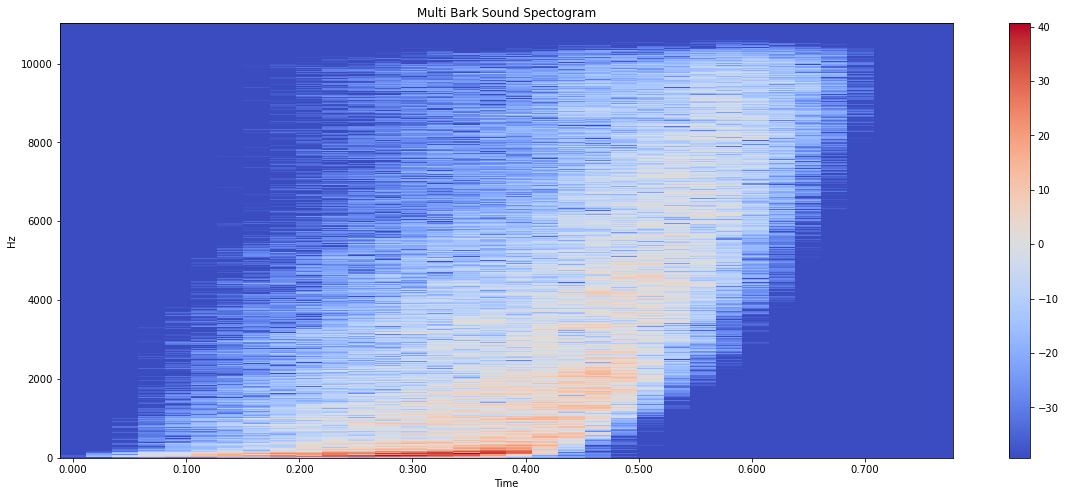

In [35]:
sample2 = "C:/Users/SourcesNet/Downloads/test.wav"
x,sr = librosa.load(sample2)
X=librosa.stft(x) #stft -> Short-time Fourier transform
X_db=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(20,8))
librosa.display.specshow(X_db, sr=sr,x_axis="time",y_axis="hz")
plt.title("Multi Bark Sound Spectogram")
plt.colorbar()

'''
rate, audio = wf.read('C:/Users/SourcesNet/Downloads/test.wav')
freqs, time, spec = signal.spectrogram(audio, fs=rate)

plt.figure(figsize=(10,4))
plt.pcolormesh(time, freqs, np.log(spec), cmap="rainbow")

plt.xlabel("duration")
plt.ylabel("frequnecy")
plt.show()
'''

# Image signals 

image can be seen as multi-dimensional signals (2D for grayscale 3D for color) so we can use the same tools or very similar as we already know with one-dimensional signals.

In [38]:
from scipy import misc

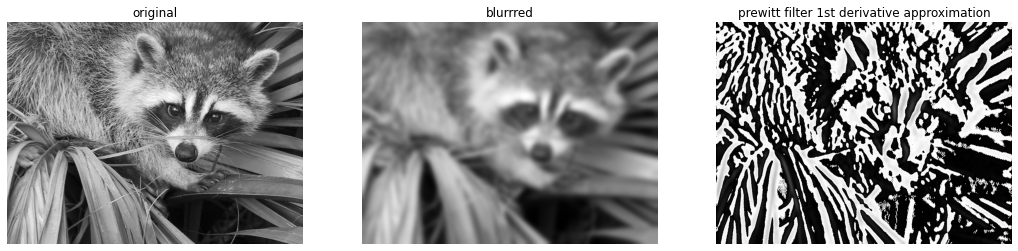

In [44]:
fig, (ax1, ax2, ax3)= plt.subplots(ncols=3, figsize=(18,5))

ax1.imshow(misc.face(gray=True), cmap='gray')
ax2.imshow(ndimage.gaussian_filter(misc.face(gray=True), sigma=8), cmap='gray')
#ax3.imshow(ndimage.prewitt(misc.face(gray=True)), cmap='gray')

ax3.imshow(ndimage.prewitt(ndimage.gaussian_filter(misc.face(gray=True), sigma=5)), cmap='gray')

ax1.set_title("original")
ax2.set_title("blurrred")
ax3.set_title("prewitt filter 1st derivative approximation")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()

# spatial_autocorrelation
Performing Moran's I to conduct correlation analysis on topological relationship.

In statistics, Moran's I is a measure of spatial autocorrelation developed by Patrick Alfred Pierce Moran. Spatial autocorrelation is characterized by a correlation in a signal among nearby locations in space. Spatial autocorrelation is more complex than one-dimensional autocorrelation because spatial correlation is multi-dimensional (i.e. 2 or 3 dimensions of space) and multi-directional.[1]

In [45]:
Global Spatial Autocorrelation
The notion of spatial autocorrelation relates to the existence of a “functional relationship between what happens at one point in space and what happens elsewhere” [Ans88]. Spatial autocorrelation thus has to do with the degree to which the similarity in values between observations in a dataset is related to the similarity in locations of such observations. This is similar to the traditional idea of correlation between two variables, which informs us about how the values in one variable change as a function of those in the other, albeit with some key differences discussed in this chapter. In a similar fashion, spatial autocorrelation is also related (but distinct) to temporal counterpart, temporal autocorrelation, which relates the value of a variable at a given point in time with those in previous periods. In contrast to these other ideas of correlation, spatial autocorrelation relates the value of the variable of interest in a given location, with values of the same variable in other locations. An alternative way to understand the concept is as the degree of information contained in the value of a variable at a given location about the value of that same variable in other locations.

Understanding Spatial Autocorrelation
In order to better understand the notion of spatial autocorrelation, it is useful to begin by considering what the world looks like in its absence. A key idea in this context is that of spatial randomness: a situation in which the location of an observation gives no information whatsoever about its value. In other words, a variable is spatially random if its distribution follows no discernible spatial pattern. Spatial autocorrelation can thus be defined as the “absence of spatial randomness”.

SyntaxError: invalid syntax (<ipython-input-45-3697daa439d2>, line 1)